In [1]:
#importando os pacotes
import numpy as np
from sklearn import preprocessing,model_selection,neighbors,metrics
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
#lendos os csv features
dflg = pd.read_csv('OVS/features/longIn0_m_0.025_i_20.0.csv',delim_whitespace=True)
df2lg =pd.read_csv('OVS/features/longIn1_m_0.025_i_20.0.csv',delim_whitespace=True)
df3lg = pd.read_csv('OVS/features/longIn2_m_0.025_i_20.0.csv',delim_whitespace=True)
df4lg = pd.read_csv('OVS/features/longIn3_m_0.025_i_20.0.csv',delim_whitespace=True)
df5lg = pd.read_csv('OVS/features/longIn4_m_0.025_i_20.0.csv',delim_whitespace=True)
df6lg = pd.read_csv('OVS/features/longIn5_m_0.025_i_20.0.csv',delim_whitespace=True)
df7lg = pd.read_csv('OVS/features/longIn6_m_0.025_i_20.0.csv',delim_whitespace=True)
df8lg = pd.read_csv('OVS/features/longIn7_m_0.025_i_20.0.csv',delim_whitespace=True)
df9lg = pd.read_csv('OVS/features/longIn8_m_0.025_i_20.0.csv',delim_whitespace=True)
dfout =  pd.read_csv('OVS/features/longOut1_m_0.025_i_20.0.csv',delim_whitespace=True)
df2out= pd.read_csv('OVS/features/longOut2_m_0.025_i_20.0.csv',delim_whitespace=True)
df3out = pd.read_csv('OVS/features/longOut3_m_0.025_i_20.0.csv',delim_whitespace=True)
df4out = pd.read_csv('OVS/features/longOut4_m_0.025_i_20.0.csv',delim_whitespace=True)
df5out =  pd.read_csv('OVS/features/longOut5_m_0.025_i_20.0.csv',delim_whitespace=True)
df6out = pd.read_csv('OVS/features/longOut6_m_0.025_i_20.0.csv',delim_whitespace=True)
dfsl = pd.read_csv('OVS/features/shortIn_m_0.1_i_20.0.csv',delim_whitespace=True)
dfsl1 = pd.read_csv('OVS/features/shortIn1_m_0.1_i_20.0.csv',delim_whitespace=True)
dfsl2 = pd.read_csv('OVS/features/shortIn2_m_0.1_i_20.0.csv',delim_whitespace=True)
dfol =  pd.read_csv('OVS/features/shortOut_m_0.1_i_20.0.csv',delim_whitespace=True)
dfol2 =  pd.read_csv('OVS/features/shortOut1_m_0.1_i_20.0.csv',delim_whitespace=True)
frameFeature = [dflg,df2lg,df3lg,df4lg,df5lg,df6lg,df4lg,df5lg,df6lg,df7lg,df8lg,df9lg,dfout,df2out,df3out,df4out,df5out,
             df6out,dfsl,dfsl1,dfsl2,dfol,dfol2]

In [3]:
#lendo os csv cpu
cpulg = pd.read_csv('OVS/cpu/longIn0.txt', header=None)
cpu2lg =pd.read_csv('OVS/cpu/longIn1.txt', header=None)
cpu3lg = pd.read_csv('OVS/cpu/longIn2.txt', header=None)
cpu4lg =pd.read_csv('OVS/cpu/longIn3.txt', header=None)
cpu5lg =pd.read_csv('OVS/cpu/longIn4.txt', header=None)
cpu6lg =pd.read_csv('OVS/cpu/longIn5.txt', header=None)
cpu7lg = pd.read_csv('OVS/cpu/longIn6.txt', header=None)
cpu8lg = pd.read_csv('OVS/cpu/longIn7.txt', header=None)
cpu9lg = pd.read_csv('OVS/cpu/longIn8.txt', header=None)
cpuOut =  pd.read_csv('OVS/cpu/longOut1.txt', header=None)
#cpu2Out =  pd.read_csv('OVS/cpu/longOut2.txt', header=None)
cpu3Out =  pd.read_csv('OVS/cpu/longOut3.txt', header=None)
cpu4Out =  pd.read_csv('OVS/cpu/longOut4.txt', header=None)
cpu5Out =  pd.read_csv('OVS/cpu/longOut5.txt', header=None)
cpu6Out =  pd.read_csv('OVS/cpu/longOut6.txt', header=None)
cpusl =  pd.read_csv('OVS/cpu/shortIn0.txt', header=None)
cpu2sl =  pd.read_csv('OVS/cpu/shortIn1.txt', header=None)
cpu3sl =  pd.read_csv('OVS/cpu/shortIn2.txt', header=None)
cpuso = pd.read_csv('OVS/cpu/shortOut0.txt', header=None)
cpu2so = pd.read_csv('OVS/cpu/shortOut1.txt', header=None)
frameCpus = [cpulg ,cpu2lg,cpu3lg,cpu4lg,cpu5lg,cpu6lg,cpu7lg,cpu8lg,cpu9lg,cpuOut,cpu3Out,cpu4Out,cpu5Out,cpu6Out,
             cpusl,cpu2sl,cpu3sl,cpuso,cpu2so]

In [4]:
#concatenando os os dataframes feartures

dfFeatures = pd.concat(frameFeature)
#concatenando os datarames cpu

dfCpu = pd.concat(frameCpus)


In [5]:
names = dfFeatures.columns# criando um escala objeto
scaler = preprocessing.StandardScaler()# Ajuste seus dados no objeto scaler
scaled_df = scaler.fit_transform(dfFeatures) # botando o dataframe do escala
scaled_df = pd.DataFrame(scaled_df, columns=names)#criando um novo dataframe com msm nome
namesCpu = dfCpu.columns
scaled_cpu = scaler.fit_transform(dfCpu)
scaled_cpu = pd.DataFrame(scaled_cpu, columns=namesCpu)

In [6]:
#tratando os numeros nulos.
imputer = preprocessing.Imputer(missing_values='NaN',axis =0, strategy='mean')
imputer.fit_transform(scaled_df)
print(scaled_df.isnull().values.any())

False


C:\Users\FOP-UPE1\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
#saparando em variaveis pra para o treino
X = np.array(scaled_df.values)
y = np.array(scaled_cpu.values)


#vendo o tamanho do array
print(X.shape)
print(y.shape)

(1425, 87)
(1191, 1)


In [8]:
X2 = X[0:len(y)]
print(X.shape)
print(X2.shape)

(1425, 87)
(1191, 87)


In [10]:
#separando em treino e teste
X_train,X_test,y_train,y_test = model_selection.train_test_split(X2,y,test_size=0.2)

In [11]:
#usando kneighbors regressor
knr = neighbors.KNeighborsRegressor(2)
#treinando 
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [12]:
#predizendo o treino
train_prev = knr.predict(X_train)
#predizndo o teste
test_prev = knr.predict(X_test)
#a exatidão da previsão do treino
print('A exatidão treino foi de {0:0.4}'.format(metrics.r2_score(y_train, train_prev)))
#a exatidão da previsão dp test 
print('A exatidão do teste foi de {0:0.4}'.format(metrics.r2_score(y_test,test_prev)))

A exatidão treino foi de 0.5843
A exatidão do teste foi de -0.8279


In [13]:
base1 =  pd.DataFrame(y_train)
base2 = pd.DataFrame(y_test)

train, test = base1[1:], base2

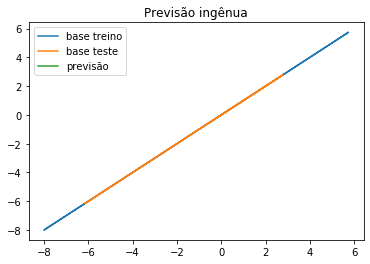

In [14]:
dd= np.asarray(train)
y_hat = test.copy()
y_hat = dd[len(dd)-1]
plt.plot(train, train, label='base treino')
plt.plot(test,test, label='base teste')
plt.plot(y_hat,y_hat, label='previsão')
plt.legend(loc='best')
plt.title("Previsão ingênua")
plt.show()

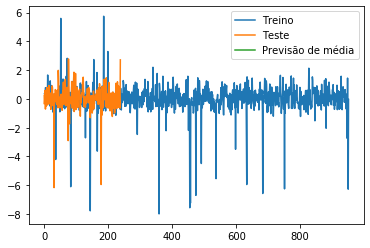

In [15]:
y_hat_avg = test.copy()
y_hat_avg = train.mean()
plt.plot(train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(y_hat_avg, label='Previsão de média')
plt.legend(loc='best')
plt.show()

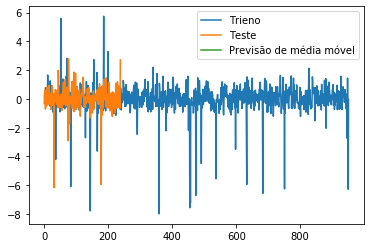

In [16]:
y_hat_avg = test.copy()
y_hat_avg = train.rolling(10).mean().iloc[-1]
plt.plot(train, label='Trieno')
plt.plot(test, label='Teste')
plt.plot(y_hat_avg, label='Previsão de média móvel')
plt.legend(loc='best')
plt.show()


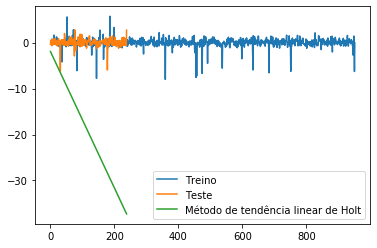

In [17]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg = fit1.forecast(len(test))
plt.plot(train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(y_hat_avg, label='')
plt.legend(loc='best')
plt.show()

C:\Users\FOP-UPE1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


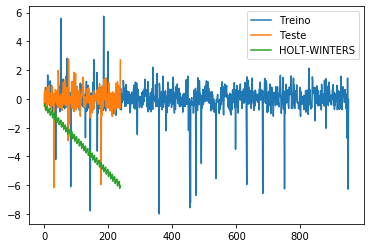

In [18]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg = fit1.forecast(len(test))
plt.plot( train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(y_hat_avg
         , label='HOLT-WINTERS')
plt.legend(loc='best')
plt.show()